Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_1 = pd.read_csv('train.csv')
dataset_2 = pd.read_csv('ObesitData_phy_act.csv')

final_dataset = pd.concat([dataset_1,dataset_2],axis=0)
final_dataset.to_csv(r'D:\SPRINGBOAT_PROJECT\New folder\final_dataset.csv',index = False)
original_dataset = final_dataset.copy(deep = True)
original_dataset.to_csv(r'D:\SPRINGBOAT_PROJECT\New folder\original_dataset.csv',index = False)

In [4]:
final_dataset.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
final_dataset.shape

(22869, 18)

In [6]:
final_dataset.drop(columns=['id'],inplace = True)

In [7]:
final_dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


#Renaming the columns for better understanding


In [8]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   family_history_with_overweight  22869 non-null  object 
 5   FAVC                            22869 non-null  object 
 6   FCVC                            22869 non-null  float64
 7   NCP                             22869 non-null  float64
 8   CAEC                            22869 non-null  object 
 9   SMOKE                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  SCC                             22869 non-null  object 
 12  FAF                             22869 

In [9]:
new_columns = ['Gender', 'Age', 'Height', 'Weight', 'Family_history_with_overweight', 'FCOHCF', 'FCOV', 'NMM', 'COFBM', 'Smoke', 'CH2O', 'Calorie_Consump_Monitoring', 'Physical_Activity_F', 'Time_using_techno_D', 'Consumption_Alc', 'MTRANS', 'NObesity']
print('Length of new columns :- ',len(new_columns))

final_dataset.columns = new_columns

Length of new columns :-  17


In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          22869 non-null  object 
 1   Age                             22869 non-null  float64
 2   Height                          22869 non-null  float64
 3   Weight                          22869 non-null  float64
 4   Family_history_with_overweight  22869 non-null  object 
 5   FCOHCF                          22869 non-null  object 
 6   FCOV                            22869 non-null  float64
 7   NMM                             22869 non-null  float64
 8   COFBM                           22869 non-null  object 
 9   Smoke                           22869 non-null  object 
 10  CH2O                            22869 non-null  float64
 11  Calorie_Consump_Monitoring      22869 non-null  object 
 12  Physical_Activity_F             22869 

In [12]:
# Gender distribution
print("Gender distribution:")
print(final_dataset['Gender'].value_counts())

# Age distribution
print("Age distribution:")
print(final_dataset['Age'].value_counts())

# Family history with overweight
print("\nFamily history with overweight:")
print(final_dataset['Family_history_with_overweight'].value_counts())

# Frequent consumption of high-calorie food (FCOHCF)
print("\nFrequent consumption of high-calorie food (FCOHCF):")
print(final_dataset['FCOHCF'].value_counts())

# Consumption of food between meals (COFBM)
print("\nConsumption of food between meals (COFBM):")
print(final_dataset['COFBM'].value_counts())

# Smoking habits
print("\nSmoking habits:")
print(final_dataset['Smoke'].value_counts())

# Calorie consumption monitoring
print("\nCalorie consumption monitoring:")
print(final_dataset['Calorie_Consump_Monitoring'].value_counts())

# Alcohol consumption (Consumption_Alc)
print("\nAlcohol consumption (Consumption_Alc):")
print(final_dataset['Consumption_Alc'].value_counts())

# Mode of transportation (MTRANS)
print("\nMode of transportation (MTRANS):")
print(final_dataset['MTRANS'].value_counts())

# Obesity levels (NObesity)
print("\nObesity levels (NObesity):")
print(final_dataset['NObesity'].value_counts())

Gender distribution:
Gender
Female    11465
Male      11404
Name: count, dtype: int64
Age distribution:
Age
18.000000    2044
26.000000    1907
21.000000    1739
23.000000    1291
19.000000     945
             ... 
28.367765       1
19.233541       1
18.702587       1
17.024853       1
25.777565       1
Name: count, Length: 1739, dtype: int64

Family history with overweight:
Family_history_with_overweight
yes    18740
no      4129
Name: count, dtype: int64

Frequent consumption of high-calorie food (FCOHCF):
FCOHCF
yes    20848
no      2021
Name: count, dtype: int64

Consumption of food between meals (COFBM):
COFBM
Sometimes     19294
Frequently     2714
Always          531
no              330
Name: count, dtype: int64

Smoking habits:
Smoke
no     22580
yes      289
Name: count, dtype: int64

Calorie consumption monitoring:
Calorie_Consump_Monitoring
no     22086
yes      783
Name: count, dtype: int64

Alcohol consumption (Consumption_Alc):
Consumption_Alc
Sometimes     16467
no     

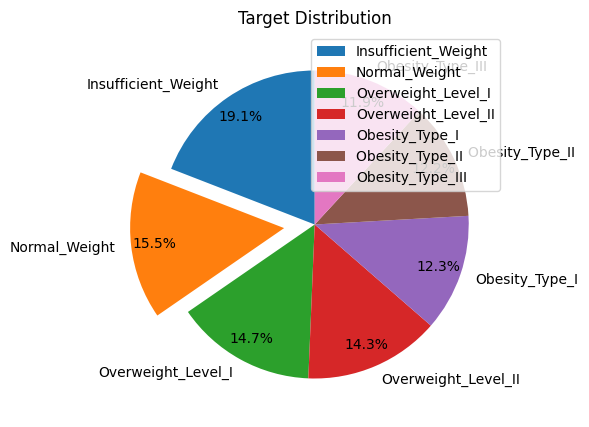

None


In [13]:
# Pie chart of target variable checking a which class dominates the dataset
plt.figure(figsize=(5, 5))
myexplode = [ 0, 0.2, 0, 0, 0, 0, 0]
plt.pie(final_dataset['NObesity'].value_counts(), labels=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II ', 'Obesity_Type_III'],
        autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=myexplode)
plt.legend(loc='upper right')
plt.title("Target Distribution")
print(plt.show())

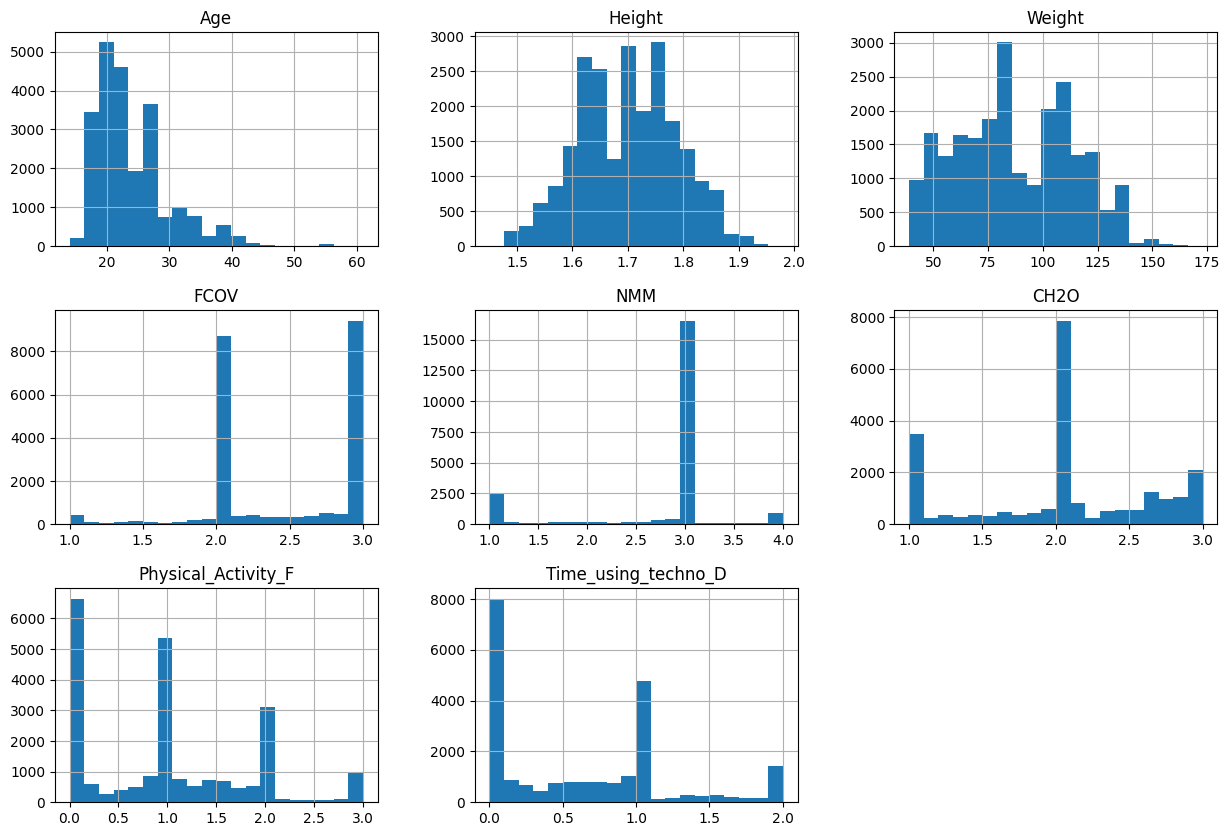

In [14]:
# Plotting histogram
final_dataset.hist(figsize=(15,10), bins=20)
plt.show()

In [15]:
# Checking for not available values
final_dataset.isna().any()
final_dataset.isna().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
Family_history_with_overweight    0
FCOHCF                            0
FCOV                              0
NMM                               0
COFBM                             0
Smoke                             0
CH2O                              0
Calorie_Consump_Monitoring        0
Physical_Activity_F               0
Time_using_techno_D               0
Consumption_Alc                   0
MTRANS                            0
NObesity                          0
dtype: int64

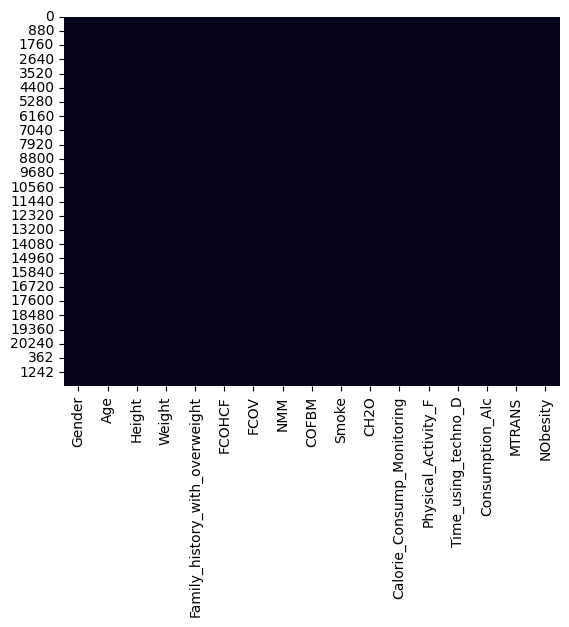

In [16]:
# Heatmap of null values
sns.heatmap(final_dataset.isnull(), cbar=False)
plt.show()

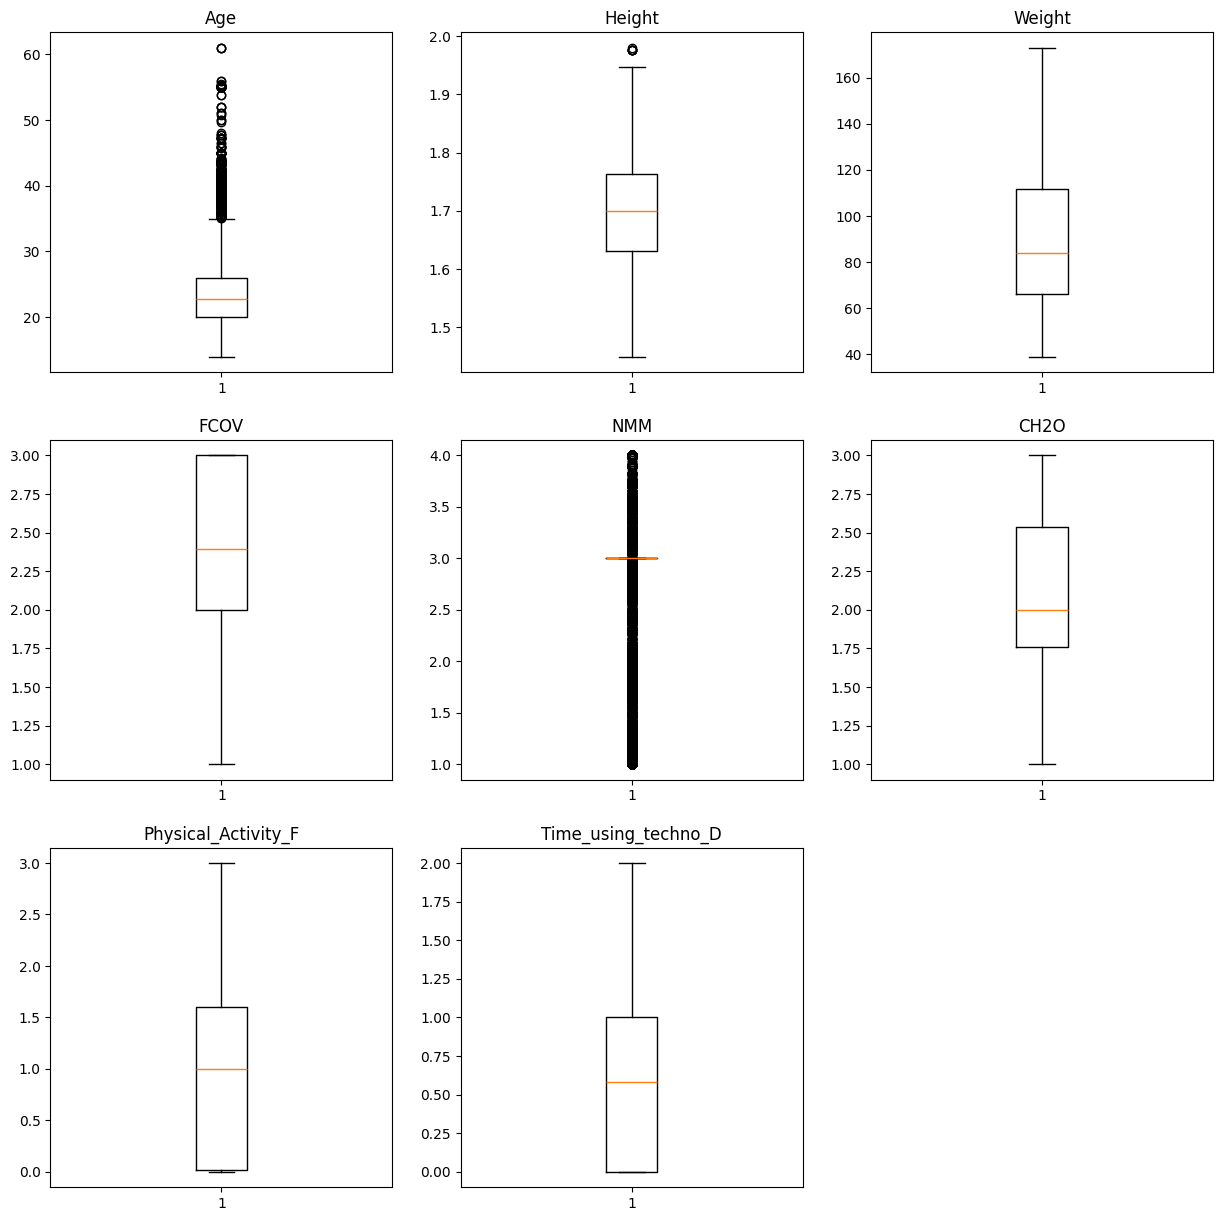

In [17]:
# Box plot
plt.figure(figsize=(15,15))
plt.subplot(3,3,1) #four rows,2columns 1 fig of size 15,35 inches
plt.boxplot(final_dataset.Age)
plt.title('Age')
plt.subplot(3,3,2) #4rows,1 column 2nd fig
plt.boxplot(final_dataset.Height)
plt.title('Height')
plt.subplot(3,3,3)
plt.boxplot(final_dataset.Weight)
plt.title('Weight')
plt.subplot(3,3,4)
plt.boxplot(final_dataset.FCOV)
plt.title('FCOV')
plt.subplot(3,3,5)
plt.boxplot(final_dataset.NMM)
plt.title('NMM')
plt.subplot(3,3,6)
plt.boxplot(final_dataset.CH2O)
plt.title('CH2O')
plt.subplot(3,3,7)
plt.boxplot(final_dataset.Physical_Activity_F)
plt.title('Physical_Activity_F')
plt.subplot(3,3,8)
plt.boxplot(final_dataset.Time_using_techno_D)
plt.title('Time_using_techno_D')
plt.show()

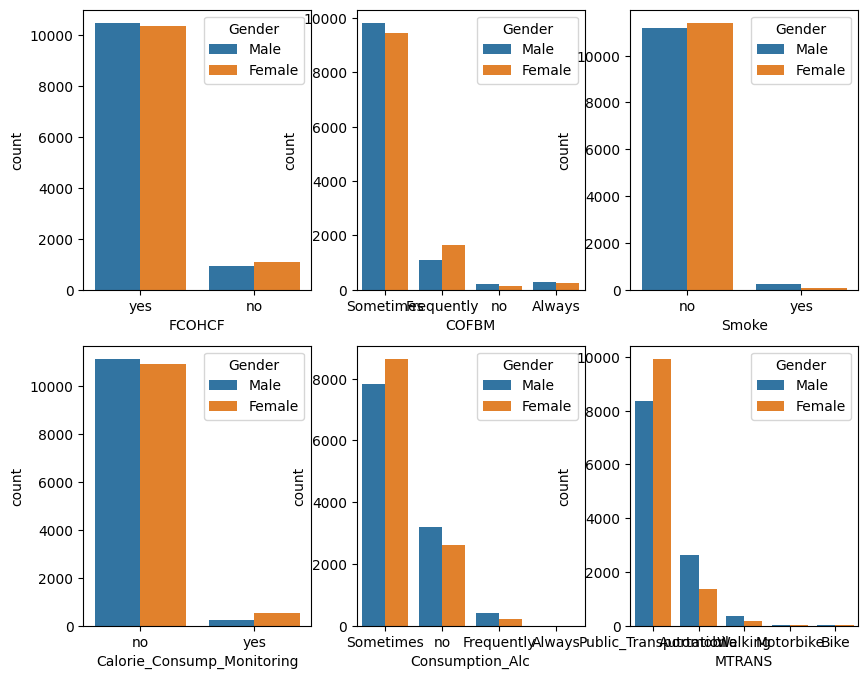

In [18]:
# Countplot for catagorical atributes  checking the imbalance in data
plt.figure(figsize=(10,8))
plt.subplot(2,3,1)
sns.countplot(data= final_dataset, x ='FCOHCF',hue='Gender')
plt.subplot(2,3,2)
sns.countplot(data= final_dataset, x ='COFBM',hue='Gender')
plt.subplot(2,3,3)
sns.countplot(data= final_dataset, x ='Smoke',hue='Gender')
plt.subplot(2,3,4)
sns.countplot(data= final_dataset, x ='Calorie_Consump_Monitoring',hue='Gender')
plt.subplot(2,3,5)
sns.countplot(data= final_dataset, x ='Consumption_Alc',hue='Gender')
plt.subplot(2,3,6)
sns.countplot(data= final_dataset, x ='MTRANS',hue='Gender')
plt.show()

In [19]:
###########   preprocessing   ############

# since no missing donot need to handle it

# Check for any remaining duplicates values
print(final_dataset.duplicated().any()) #true

# Drpping duplicates
print(final_dataset.drop_duplicates(inplace=True))


True
None


In [20]:
print(final_dataset.shape)

(22845, 17)


In [21]:
## Handeling outliers ##
#since outliers seen in weight, age, height, nmm

for cols in final_dataset.columns:
    if final_dataset[cols].dtype == object :       # Selecting only numerical column
        continue
    else:
        Q1 = final_dataset[cols].quantile(q=0.25)
        Q3 = final_dataset[cols].quantile(q=0.75)
        iqr = Q3-Q1

        low = Q1 - 1.5*(Q3-Q1) #lower bound for q1
        high = Q3 + 1.5*(Q3-Q1) #higher bound for q3
        final_dataset.loc[(final_dataset[cols]<low) | (final_dataset[cols]>high),cols] = final_dataset[cols].median()
         # Replacing outliers with median

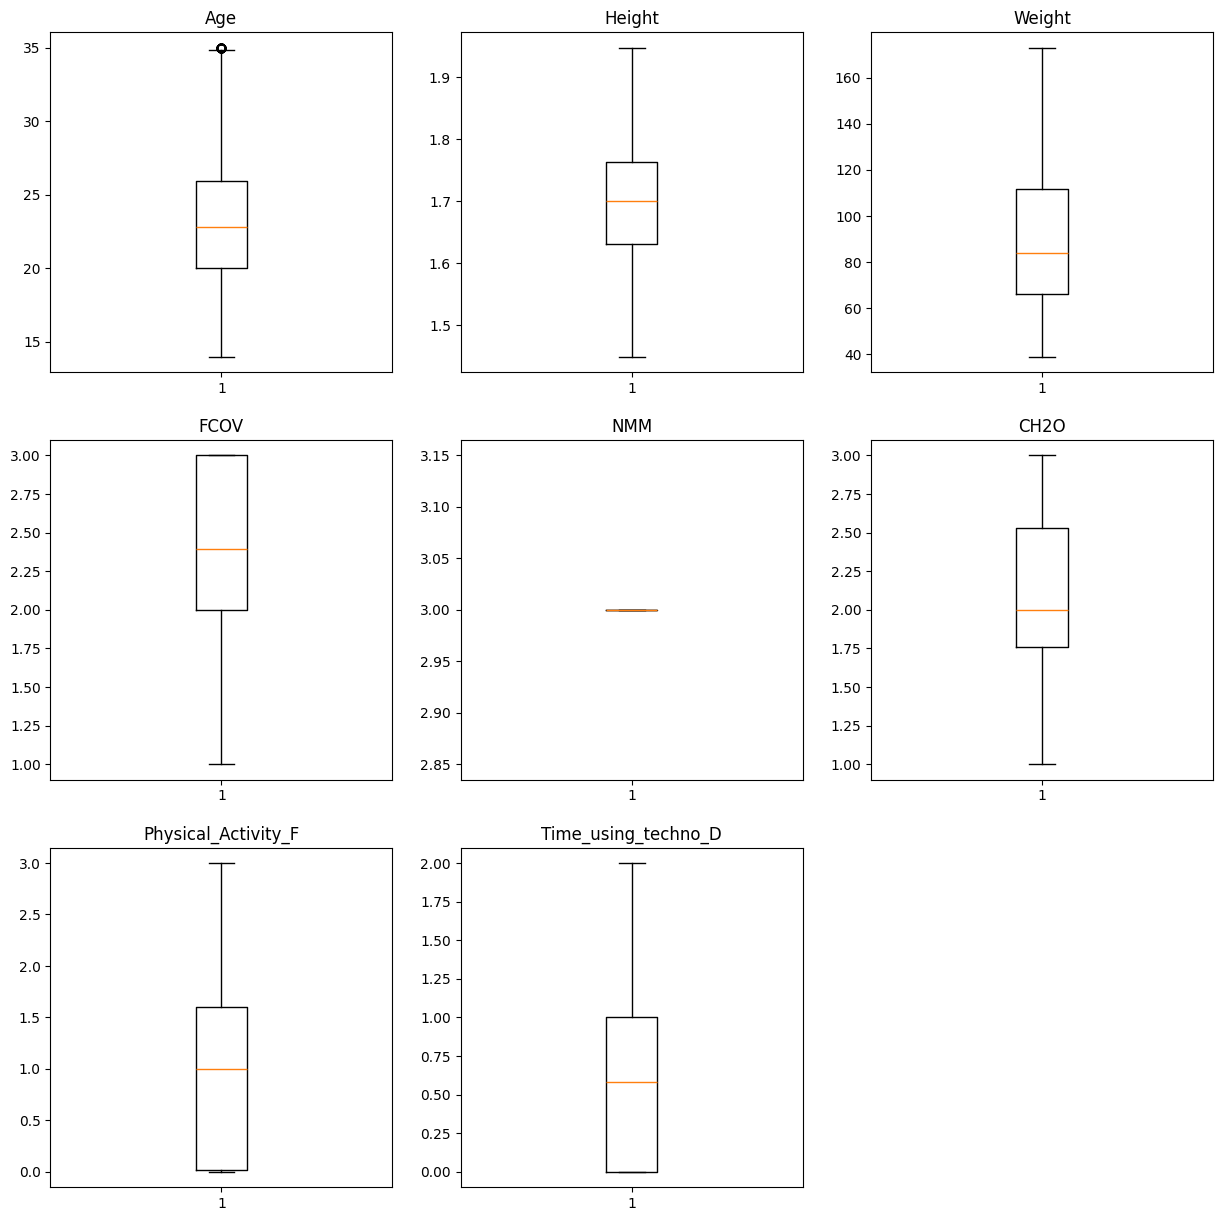

In [22]:
# Box plot
plt.figure(figsize=(15,15))
plt.subplot(3,3,1) #four rows,2columns 1 fig of size 15,35 inches
plt.boxplot(final_dataset.Age)
plt.title('Age')
plt.subplot(3,3,2) #4rows,1 column 2nd fig
plt.boxplot(final_dataset.Height)
plt.title('Height')
plt.subplot(3,3,3)
plt.boxplot(final_dataset.Weight)
plt.title('Weight')
plt.subplot(3,3,4)
plt.boxplot(final_dataset.FCOV)
plt.title('FCOV')
plt.subplot(3,3,5)
plt.boxplot(final_dataset.NMM)
plt.title('NMM')
plt.subplot(3,3,6)
plt.boxplot(final_dataset.CH2O)
plt.title('CH2O')
plt.subplot(3,3,7)
plt.boxplot(final_dataset.Physical_Activity_F)
plt.title('Physical_Activity_F')
plt.subplot(3,3,8)
plt.boxplot(final_dataset.Time_using_techno_D)
plt.title('Time_using_techno_D')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_dataset[final_dataset.select_dtypes(include=['int','float']).columns] = scaler.fit_transform(final_dataset[final_dataset.select_dtypes(include=['int','float']).columns])  # Selecting only numerical features
final_dataset.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity
0,Male,0.364390,-0.004516,-0.232290,yes,yes,-0.831819,0.0,Sometimes,no,1.210272,no,-1.172529,0.589741,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,-1.205129,-1.599941,-1.168077,yes,yes,-0.831819,0.0,Frequently,no,-0.044645,no,0.018358,0.628771,no,Automobile,Normal_Weight
2,Female,-1.205129,0.126106,-1.427315,yes,yes,-1.055798,0.0,Sometimes,no,-0.191936,no,-0.141167,1.746217,no,Public_Transportation,Insufficient_Weight
3,Female,-0.485842,0.117787,1.649336,yes,yes,1.043017,0.0,Sometimes,no,-0.580319,no,0.575530,0.264131,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,2.117842,2.436382,0.227756,yes,yes,0.442440,0.0,Sometimes,no,-0.077764,no,1.171105,0.515499,Sometimes,Public_Transportation,Overweight_Level_II


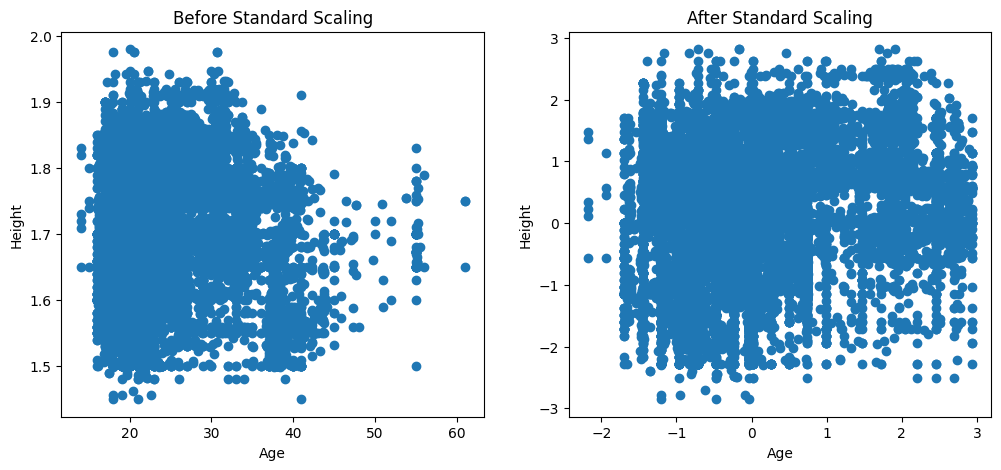

In [24]:
# Now using scatterplot will understand what changes has been made

scaled = pd.DataFrame(final_dataset[final_dataset.select_dtypes(include=['int','float']).columns])
scaled.columns = list(final_dataset.select_dtypes(include=['int','float']).columns)

# scatterplot of before scaling and after scaling data.
# taking age and weight column as example.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(original_dataset.Age, original_dataset.Height)
ax1.set_title('Before Standard Scaling')
ax1.set_xlabel('Age')
ax1.set_ylabel('Height')

ax2.scatter(scaled.Age, scaled.Height)
ax2.set_title('After Standard Scaling')
ax2.set_xlabel('Age')
ax2.set_ylabel('Height');

In [25]:
final_dataset['Gender'], c =pd.factorize(final_dataset['Gender'])
final_dataset['Family_history_with_overweight'], c = pd.factorize(final_dataset['Family_history_with_overweight'])
final_dataset['FCOHCF'], c = pd.factorize(final_dataset['FCOHCF'])
final_dataset['Smoke'], c = pd.factorize(final_dataset['Smoke'])
final_dataset['Calorie_Consump_Monitoring'], c = pd.factorize(final_dataset['Calorie_Consump_Monitoring'])

In [26]:
def dummies(x,final_dataset):
    temp = pd.get_dummies(final_dataset[x], drop_first = True) # getting encodded values for categorical values
    final_dataset = pd.concat([final_dataset, temp], axis = 1)            # conating categorical vaues with encodded values
    final_dataset.drop([x], axis = 1, inplace = True)          # dropping categorical column
    return final_dataset

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_dataset['NObesity'] = le.fit_transform(final_dataset['NObesity'])
final_dataset['COFBM'] = le.fit_transform(final_dataset['COFBM'])
final_dataset['Consumption_Alc'] = le.fit_transform(final_dataset['Consumption_Alc'])
final_dataset['MTRANS'] = le.fit_transform(final_dataset['MTRANS'])

In [28]:
final_dataset.head()

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity
0,0,0.364390,-0.004516,-0.232290,0,0,-0.831819,0.0,2,0,1.210272,0,-1.172529,0.589741,2,3,6
1,1,-1.205129,-1.599941,-1.168077,0,0,-0.831819,0.0,1,0,-0.044645,0,0.018358,0.628771,3,0,1
2,1,-1.205129,0.126106,-1.427315,0,0,-1.055798,0.0,2,0,-0.191936,0,-0.141167,1.746217,3,3,0
3,1,-0.485842,0.117787,1.649336,0,0,1.043017,0.0,2,0,-0.580319,0,0.575530,0.264131,2,3,4
4,0,2.117842,2.436382,0.227756,0,0,0.442440,0.0,2,0,-0.077764,0,1.171105,0.515499,2,3,6


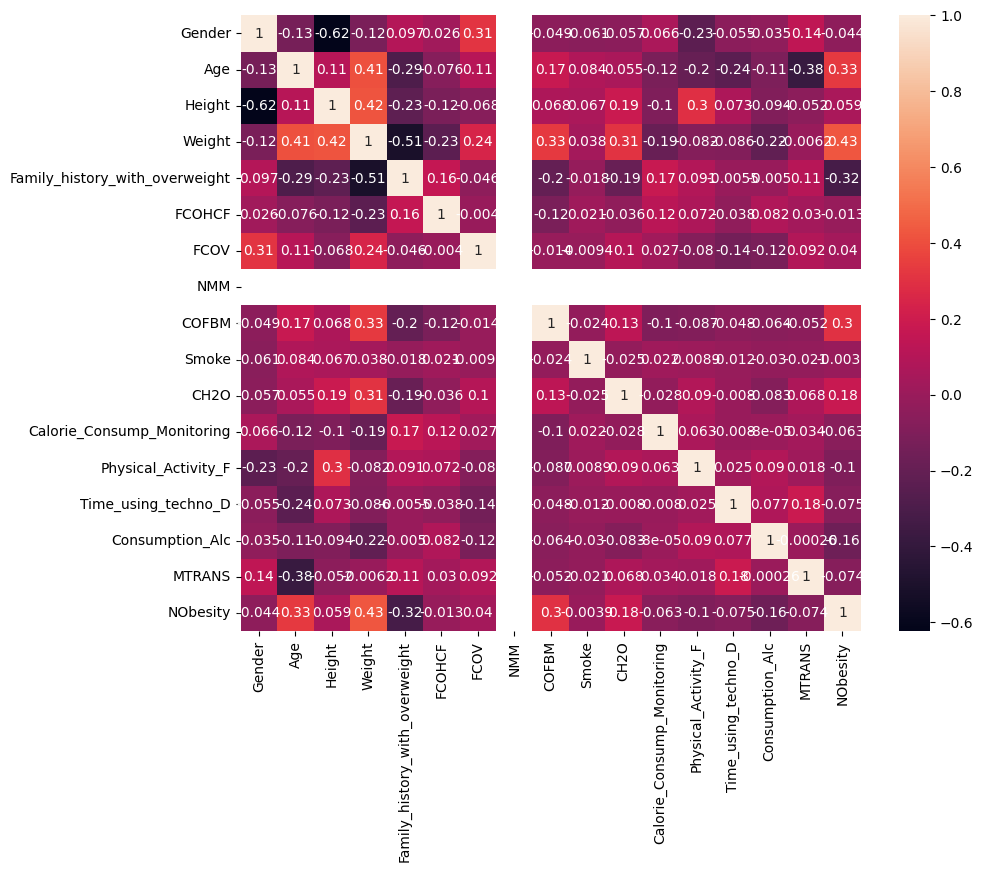

In [29]:
# Heatmap of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(final_dataset.corr(), annot=True)
plt.show()

In [30]:
##### Train Test Split


# Now we will devide our dataframe into X and y.
# X -----> Independant features
# y -----> Target feature
x = final_dataset.iloc[:,:-1]

y = final_dataset['NObesity']

In [31]:
#importing scipy for statistical functions
from scipy import stats

#skewness of data

In [32]:
print('The skewness of data is : \n',stats.skew(x))

The skewness of data is : 
 [-6.04073668e-03  7.52174985e-01  6.70291066e-03  1.06599436e-01
  1.66705048e+00  2.90033680e+00 -3.64957014e-01             nan
 -2.14404696e+00  8.72131042e+00 -2.02751446e-01  5.11973985e+00
  5.04834630e-01  6.64513302e-01  5.45237109e-01 -1.61903670e+00]


In [33]:
# Kurtosis of data  +ve > 3 -ve < 3 normal = 3
print('The kurtosis of data is :-\n',stats.kurtosis(x))

The kurtosis of data is :-
 [-1.99996351e+00  1.68967937e-01 -5.68963237e-01 -9.72851203e-01
  7.79057316e-01  6.41195355e+00 -8.66584242e-01             nan
  5.72743909e+00  7.40612555e+01 -7.56470054e-01  2.42117361e+01
 -5.08478869e-01 -4.31459676e-01 -7.02186294e-02  8.18812525e-01]


In [34]:
# Checking outliers using z-score
z_score = np.abs(stats.zscore(x))
final_dataset[(z_score > 3).all(axis=1)]

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS,NObesity


In [35]:
z_score # commonly > threshold of 3 or -3 considered as outlier 

,Gender,Age,Height,Weight,Family_history_with_overweight,FCOHCF,FCOV,NMM,COFBM,Smoke,CH2O,Calorie_Consump_Monitoring,Physical_Activity_F,Time_using_techno_D,Consumption_Alc,MTRANS
0,1.003025,0.364390,0.004516,0.232290,0.468306,0.311362,0.831819,NaN,0.335996,0.113193,1.210272,0.18839,1.172529,0.589741,0.476031,0.436562
1,0.996984,1.205129,1.599941,1.168077,0.468306,0.311362,0.831819,NaN,1.886306,0.113193,0.044645,0.18839,0.018358,0.628771,1.616106,2.148300
2,0.996984,1.205129,0.126106,1.427315,0.468306,0.311362,1.055798,NaN,0.335996,0.113193,0.191936,0.18839,0.141167,1.746217,1.616106,0.436562
3,0.996984,0.485842,0.117787,1.649336,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,0.580319,0.18839,0.575530,0.264131,0.476031,0.436562
4,1.003025,2.117842,2.436382,0.227756,0.468306,0.311362,0.442440,NaN,0.335996,0.113193,0.077764,0.18839,1.171105,0.515499,0.476031,0.436562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.996984,0.479970,0.117787,1.654406,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,0.491442,0.18839,0.823718,0.473239,0.476031,0.436562
2107,0.996984,0.234883,0.549173,1.742956,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,0.036213,0.18839,0.424915,0.036023,0.476031,0.436562
2108,0.996984,0.103073,0.590449,1.740923,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,0.044421,0.18839,0.511634,0.041978,0.476031,0.436562
2109,0.996984,0.344640,0.445081,1.727923,0.468306,0.311362,1.043017,NaN,0.335996,0.113193,1.356157,0.18839,0.184019,0.057979,0.476031,0.436562


In [36]:
# Creating dataframe of skewness and kurtosis
norm_data = pd.DataFrame()
norm_data['Atributes'] = x.columns
norm_data['Skewness'] = stats.skew(x)
norm_data['Kurtosis'] = stats.kurtosis(x)

In [37]:
norm_data

,Atributes,Skewness,Kurtosis
0,Gender,-0.006041,-1.999964
1,Age,0.752175,0.168968
2,Height,0.006703,-0.568963
3,Weight,0.106599,-0.972851
4,Family_history_with_overweight,1.667050,0.779057
5,FCOHCF,2.900337,6.411954
6,FCOV,-0.364957,-0.866584
7,NMM,NaN,NaN
8,COFBM,-2.144047,5.727439
9,Smoke,8.721310,74.061255


#feature selection

In [38]:
# Performing feature selection using Decision Tree
from sklearn.tree import DecisionTreeClassifier
FS_dt = DecisionTreeClassifier(max_depth=10).fit(x, y)

In [39]:

# Creating a dataframe of feature_importances_
feature_select = pd.DataFrame()
feature_select['Features'] = x.columns
feature_select['feature_importances_'] = FS_dt.feature_importances_
feature_select.sort_values(by='feature_importances_', ascending=False)

,Features,feature_importances_
3,Weight,0.523065
0,Gender,0.221531
2,Height,0.139893
1,Age,0.049090
10,CH2O,0.017682
5,FCOHCF,0.010136
6,FCOV,0.009227
14,Consumption_Alc,0.006440
8,COFBM,0.005947
12,Physical_Activity_F,0.005447


In [40]:
# Selecting only imp features
l = ['Weight','Height','Gender','Age','Consumption_Alc','FCOHCF','FCOV','COFBM','Physical_Activity_F','MTRANS','CH2O','Time_using_techno_D']
scaled_x = x[l]

# Dropping columns
#scaled = scaled_x.drop(columns=['NMM'],axis=1)

In [42]:
from sklearn.model_selection import train_test_split

# Splitting dataset into training (60%), validation (20%), and test (20%)
X_train, X_rem, y_train, y_rem = train_test_split(scaled_x, y, test_size=0.4, random_state=40)

# Splitting the remaining dataset into validation (50% of the remaining 40%) and test (50% of the remaining 40%)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=40)

In [49]:
# Checking the shapes of the resulting datasets
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (13707, 12)
Shape of y_train: (13707,)
Shape of X_val: (4569, 12)
Shape of y_val: (4569,)
Shape of X_test: (4569, 12)
Shape of y_test: (4569,)


#Model 1 - Logistic Regression


In [50]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [45]:
# Creating the logistic regression model
logistic_model = LogisticRegression(max_iter=30000)

# Fitting the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=30000)

In [46]:
# Checking training and validation scores
print('Training score is: %0.2f' % logistic_model.score(X_train, y_train))
print('Validation score is: %0.2f' % logistic_model.score(X_val, y_val))

Training score is: 0.86
Validation score is: 0.86


In [51]:
# Making predictions on the test set
pred_logistic = logistic_model.predict(X_test)

In [52]:
# Confusion matrix to evaluate model performance
result_logistic = confusion_matrix(y_test, pred_logistic)
print(result_logistic)

[[557  26   0   0   0   0   0]
 [ 70 536   2   0   0  53   6]
 [  1   0 539  31   6  11  47]
 [  0   0  18 714   0   0   2]
 [  0   0   0   1 868   0   0]
 [  0  56  17   0   0 384 100]
 [  0   7  71   3   3  79 361]]


In [53]:
# Accuracy score on test data
logistic_model_accuracy = accuracy_score(y_test, pred_logistic)
print('logistic_model_accuracy on test set: %0.2f' % logistic_model_accuracy)

logistic_model_accuracy on test set: 0.87


In [54]:
# Generating classification report for the test set
logistic_model_CR = classification_report(y_test, pred_logistic)
print(logistic_model_CR)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       583
           1       0.86      0.80      0.83       667
           2       0.83      0.85      0.84       635
           3       0.95      0.97      0.96       734
           4       0.99      1.00      0.99       869
           5       0.73      0.69      0.71       557
           6       0.70      0.69      0.69       524

    accuracy                           0.87      4569
   macro avg       0.85      0.85      0.85      4569
weighted avg       0.86      0.87      0.87      4569



#Model 2 Decision Tree

In [55]:
# Creating DT model
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=4)  

In [56]:
# Training the model
dt_model.fit(X_train, y_train)  

DecisionTreeClassifier(max_depth=4)

In [57]:
# Checking training and validation scores
print('Training score is:- %0.2f' % dt_model.score(X_train, y_train)) 
print('Validation score is:- %0.2f' % dt_model.score(X_val, y_val)) 

Training score is:- 0.76
Validation score is:- 0.76


In [58]:
# Predicting the model 
pred_dt = dt_model.predict(X_test)

In [59]:
# Determining accuracy of model using confusion matrix
result_dt = confusion_matrix(y_test, pred_dt)
result_dt

array([[350, 231,   0,   0,   0,   2,   0],
       [ 32, 380,   0,   0,   0, 241,  14],
       [  1,   0, 518,  67,   1,  11,  37],
       [  0,   0,  27, 705,   1,   0,   1],
       [  0,   0,   0,   1, 868,   0,   0],
       [  0,  30,  23,   0,   0, 315, 189],
       [  0,   1, 124,   2,   0,  61, 336]], dtype=int64)

In [60]:
# Accuracy using accuracy_score
dt_model_accuarcy = accuracy_score(y_test, pred_dt)
print('dt_model_accuarcy:- %0.2f' % dt_model_accuarcy)

dt_model_accuarcy:- 0.76


In [61]:
dt_model_CR = classification_report(y_test, pred_dt)
print(dt_model_CR)

              precision    recall  f1-score   support

           0       0.91      0.60      0.72       583
           1       0.59      0.57      0.58       667
           2       0.75      0.82      0.78       635
           3       0.91      0.96      0.93       734
           4       1.00      1.00      1.00       869
           5       0.50      0.57      0.53       557
           6       0.58      0.64      0.61       524

    accuracy                           0.76      4569
   macro avg       0.75      0.74      0.74      4569
weighted avg       0.77      0.76      0.76      4569



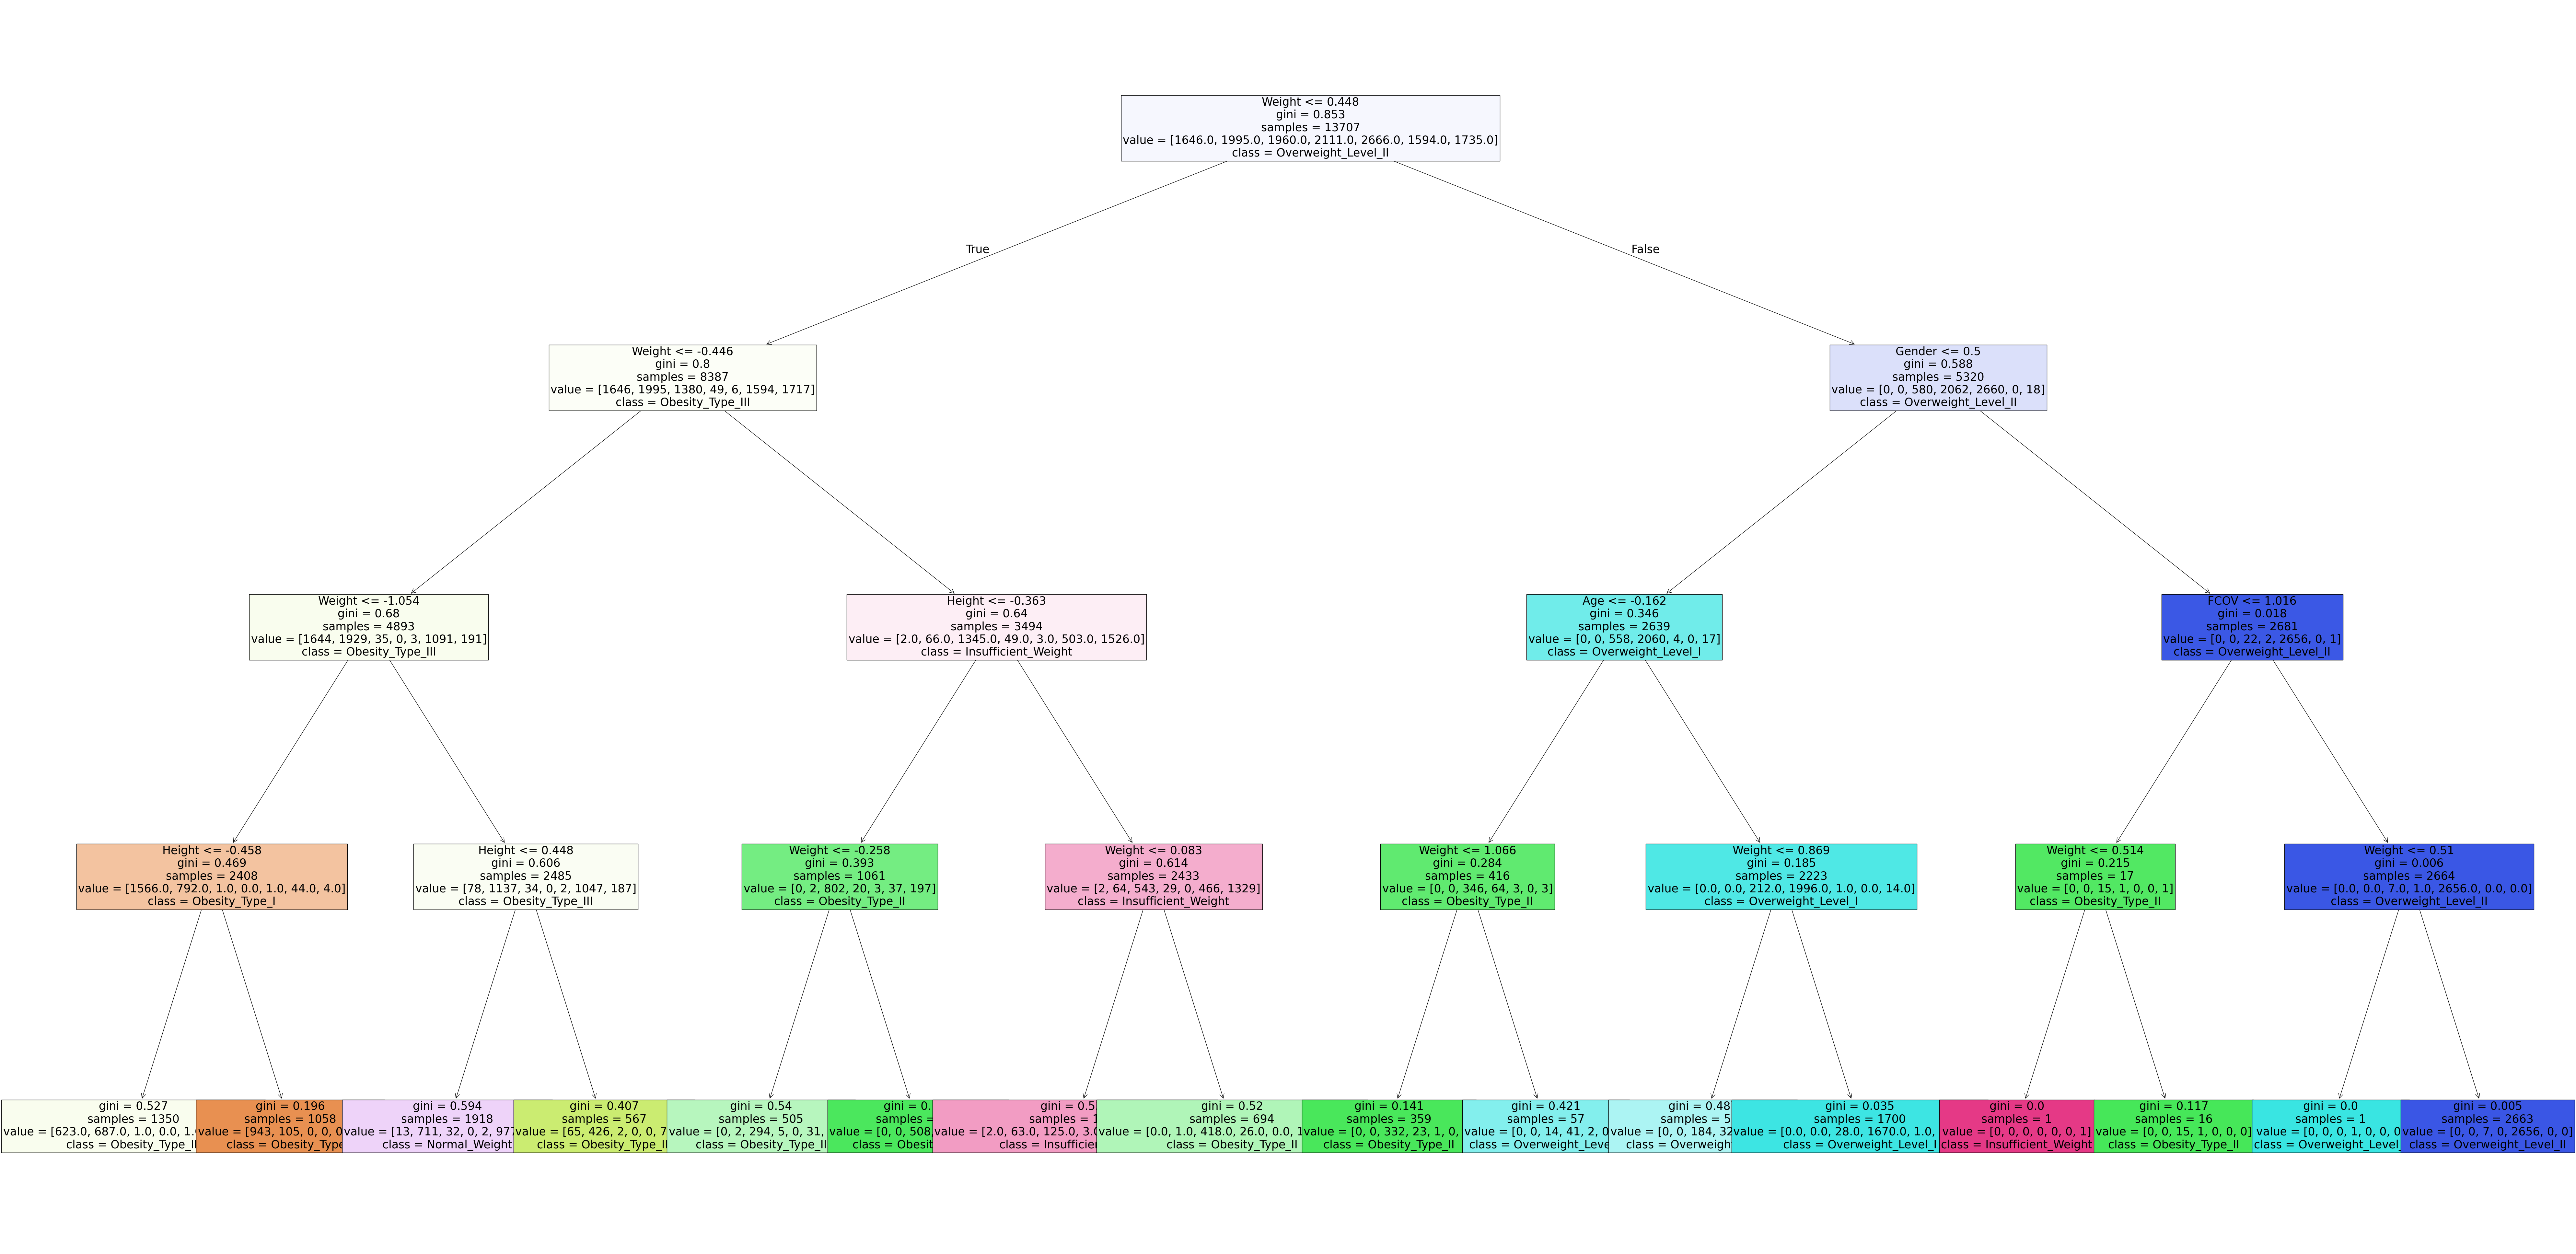

In [62]:
from sklearn import tree
fig = plt.figure(figsize=(100,50))
names = scaled_x.columns
class1 = ['Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight']

_ = tree.plot_tree(dt_model, 
                   feature_names=names,  
                   class_names=class1,
                   impurity=True,
                   filled=True,
                   fontsize=25)
fig.savefig("decision_tree.png")  # Saving the tree as an image file

#Model 3  Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
# Creating the model
rf_model = RandomForestClassifier()
# Training the model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:

# Predicting the model 
pred_rf = rf_model.predict(X_test)

In [59]:

# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_model.score(X_train,y_train)) 
print('Validation score is:- %0.2f' % rf_model.score(X_val, y_val)) 

Training score is:- 1.00
Validation score is:- 0.90


In [60]:

# Determining accuracy of model using confusion matrix
result_rf = confusion_matrix(y_test, pred_rf)
result_rf


array([[535,  45,   0,   0,   2,   1,   0],
       [ 33, 594,   0,   0,   0,  33,   7],
       [  1,   3, 557,  18,   2,  13,  41],
       [  0,   0,  17, 711,   1,   0,   5],
       [  0,   0,   0,   1, 868,   0,   0],
       [  0,  61,  12,   0,   0, 414,  70],
       [  0,   9,  44,   1,   0,  46, 424]], dtype=int64)

In [61]:
print('The accuracy of the model is :-%0.2f' %accuracy_score(y_test, pred_rf))

The accuracy of the model is :-0.90


Model 4- XGBoost

In [62]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [63]:
# Creating the model
xgb_model = XGBClassifier()
# Training the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %xgb_model.score(X_train, y_train)) 
print('validation score is:- %0.2f' %xgb_model.score(X_val, y_val))

Training score is:- 0.99
validation score is:- 0.91


In [75]:
# Predicting the model 
pred_xgb = xgb_model.predict(X_test)

In [76]:
print('The accuracy of the model is :-%0.2f' %accuracy_score(y_test, pred_xgb))

The accuracy of the model is :-0.91


#Hypertuning- Random Forest

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [81]:

# Specifying cross-validator with 5 splits for more robust validation
folds = KFold(n_splits=5, shuffle=True, random_state=40)

# Giving hyperparameters to tune with a slightly extended max_depth range
tuned_paramaters = [{'criterion':['gini', 'entropy'],             
                     'max_depth':list(range(4, 12)),  # Extended range
                     'min_samples_split':list(range(2, 5)),
                     'min_samples_leaf':list(range(1, 5)),
                     'max_features':['sqrt', 'log2', None]}]

# Initializing RandomForest with parallel processing for faster training
rf = RandomForestClassifier(n_jobs=-1)                                  

# Performing grid search with 5-fold cross-validation
grid_search_rf = GridSearchCV(rf,
                              param_grid=tuned_paramaters, 
                              cv=folds,
                              scoring='accuracy',  # Optionally try 'f1' or 'roc_auc'
                              verbose=1)

# Fit the model to the data
grid_search_rf.fit(X_train, y_train)


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


c:\Users\Rishi shah\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=40, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7, 8, 9, 10, 11],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_leaf': [1, 2, 3, 4],
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy', verbose=1)

In [82]:
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
RandomForestClassifier(max_depth=11, max_features=None, min_samples_leaf=2,
                       n_jobs=-1)


In [83]:
# Creating model on hypertuned parameters
rf_hyper_model= RandomForestClassifier(criterion='entropy', 
                                       max_depth=11, 
                                       max_features=None,
                                       min_samples_split=2,)

rf_hyper_model = rf_hyper_model.fit(X_train,y_train)
pred_rf_hyper_model = rf_hyper_model.predict(X_test)

In [87]:
# Determining score of test and train dataset
print('Training score is:- %0.2f' %rf_hyper_model.score(X_train, y_train)) 
print('validation:- %0.2f' %rf_hyper_model.score(X_test, y_test)) 

Training score is:- 0.95
validation:- 0.90


In [88]:
print('The final accuracy of the model is :-%0.2f' %accuracy_score(y_test, pred_rf_hyper_model))

The final accuracy of the model is :-0.90
